In [11]:
import numpy as np
import torch

x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)

print(x)
print(w)
print(b)

tensor(3.)
tensor(4., requires_grad=True)
tensor(5., requires_grad=True)


In [12]:
y = w * x + b
print(y)

tensor(17., grad_fn=<AddBackward0>)


In [13]:
## Compute Gradients
y.backward()
print("dy/dw:", w.grad)
print("dy/db:", b.grad)

dy/dw: tensor(3.)
dy/db: tensor(1.)


In [14]:
import matplotlib.pyplot as plt

inputs = np.array([1,2,3,4,5])
targets = np.array([1,2,3,4,5])

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)

w = torch.randn(1)
b = torch.randn(1)

tensor([1, 2, 3, 4, 5])
tensor([1, 2, 3, 4, 5])


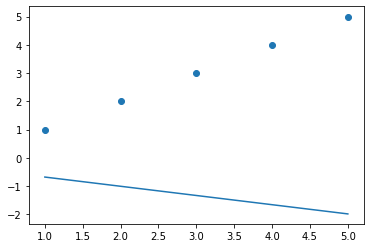

In [15]:
h = w * inputs + b

plt.scatter(inputs, targets)
plt.plot(inputs, h)
plt.show()

In [16]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([-0.3523], requires_grad=True)

In [17]:
def model(x):
    return x * w + b

preds = model(inputs)
print(preds)
print(targets)

def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

loss = mse(preds, targets)
print(loss)

tensor([-0.6785, -1.0046, -1.3308, -1.6570, -1.9832], grad_fn=<AddBackward0>)
tensor([1, 2, 3, 4, 5])
tensor(22.2737, grad_fn=<DivBackward0>)


##### Pytorch의 마법(?)
Pytorch와 Tensorflow의 차이점은 `Eager Execution` 환경인지 아닌지에 달려있다. Tensorflow는 모든 데이터를 그래프로 만들어서 마지막에 한 번에 실행하는 코드 디자인을 가진 반면, Pytorch는 바로 연산하여 결과를 볼 수 있다. 다만, Back Propagation을 편하게 하기 위해서 모든 미분 과정은 자동으로 구해진다.

In [18]:
# train for 100 epochs
for steps in range(2000):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    
    with torch.no_grad():
        w -= w.grad * 0.01
        b -= b.grad * 0.01
        
        w.grad.zero_()
        b.grad.zero_()

In [19]:
preds = model(inputs)
loss = mse(preds, targets)

print("w:", w, "b:", b)
print("input: ", inputs)
print("prediction: ", preds)
print("target: ", targets)

w: tensor([1.0000], requires_grad=True) b: tensor([1.6382e-05], requires_grad=True)
input:  tensor([1, 2, 3, 4, 5])
prediction:  tensor([1.0000, 2.0000, 3.0000, 4.0000, 5.0000], grad_fn=<AddBackward0>)
target:  tensor([1, 2, 3, 4, 5])
